# Bitcoin Mining Analysis

# by: Peixiong Zhao

# Bitcoin Hashrate Analysis
This analysis explores the current hashrate values sourced from blockchain.com and use rolling day averages as a mean of technical analysis. There is a significant drop in hashrate in the middle of 2021 due to China Ban and it ever since has increased to all time highs.

In [124]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [125]:
#read the csv
bitcoin_mining = pd.read_csv('hash-rate - raw data.csv')
bitcoin_mining.head()

,Timestamp,hash-rate
0,2019-02-23 00:00:00,4.308872e+07
1,2019-02-24 00:00:00,4.129826e+07
2,2019-02-25 00:00:00,4.316213e+07
3,2019-02-26 00:00:00,4.859513e+07
4,2019-02-27 00:00:00,4.255847e+07


In [126]:
#Set only the date from datetime
date = pd.to_datetime(bitcoin_mining['Timestamp'])

#Set x, y value
x=date
y=list(bitcoin_mining['hash-rate'])

# computing a 7 day rolling average
bitcoin_mining['30day_rolling_avg'] = bitcoin_mining['hash-rate'].rolling(30).mean()
bitcoin_mining['60day_rolling_avg'] = bitcoin_mining['hash-rate'].rolling(60).mean()
bitcoin_mining['90day_rolling_avg'] = bitcoin_mining['hash-rate'].rolling(90).mean()
bitcoin_mining['30day_rolling_avg_std'] = bitcoin_mining['hash-rate'].rolling(30).std()    
    
# viewing the dataset
display(bitcoin_mining.head(10))

,Timestamp,hash-rate,30day_rolling_avg,60day_rolling_avg,90day_rolling_avg,30day_rolling_avg_std
0,2019-02-23 00:00:00,4.308872e+07,NaN,NaN,NaN,NaN
1,2019-02-24 00:00:00,4.129826e+07,NaN,NaN,NaN,NaN
2,2019-02-25 00:00:00,4.316213e+07,NaN,NaN,NaN,NaN
3,2019-02-26 00:00:00,4.859513e+07,NaN,NaN,NaN,NaN
4,2019-02-27 00:00:00,4.255847e+07,NaN,NaN,NaN,NaN
5,2019-02-28 00:00:00,4.527497e+07,NaN,NaN,NaN,NaN
6,2019-03-01 00:00:00,4.889696e+07,NaN,NaN,NaN,NaN
7,2019-03-02 00:00:00,3.984197e+07,NaN,NaN,NaN,NaN
8,2019-03-03 00:00:00,4.406763e+07,NaN,NaN,NaN,NaN
9,2019-03-04 00:00:00,4.135114e+07,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Bitcoin Hashrate (P.Z)')

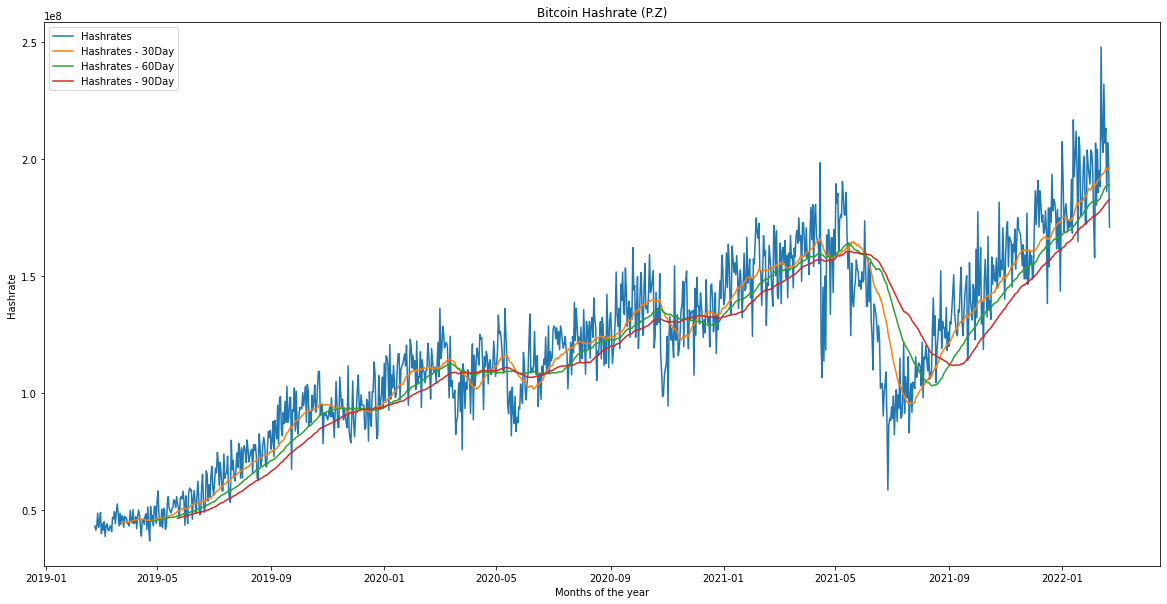

In [127]:
# set figure size
plt.figure( figsize = ( 20, 10))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x=date,
             y=list(bitcoin_mining['hash-rate']),
             data = bitcoin_mining,
             label = 'Hashrates')
#Rolling Average
sns.lineplot( x=date,
             y=bitcoin_mining['30day_rolling_avg'],
             data = bitcoin_mining,
             label = 'Hashrates - 30Day',)
sns.lineplot( x=date,
             y=bitcoin_mining['60day_rolling_avg'],
             data = bitcoin_mining,
             label = 'Hashrates - 60Day',)
sns.lineplot( x=date,
             y=bitcoin_mining['90day_rolling_avg'],
             data = bitcoin_mining,
             label = 'Hashrates - 90Day',)
      
plt.xlabel( 'Months of the year')
plt.ylabel('Hashrate')
plt.title('Bitcoin Hashrate (P.Z)')

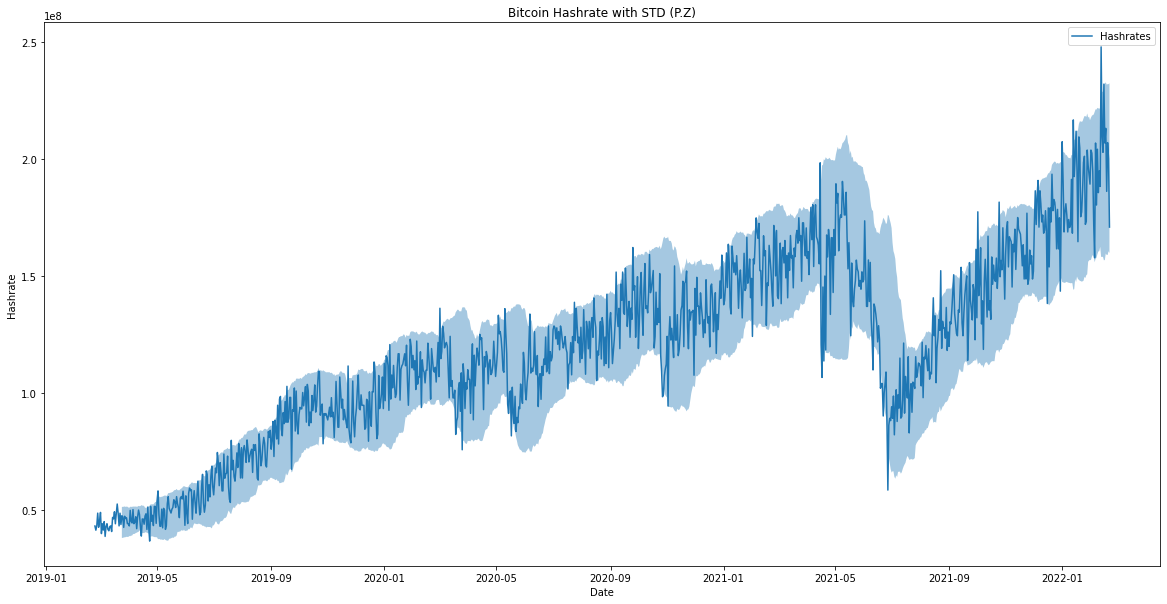

In [128]:
plt.figure( figsize = ( 20, 10))
bitcoin_mining['MA'] = bitcoin_mining['hash-rate'].rolling(30).mean()
bitcoin_mining['STD'] = bitcoin_mining['hash-rate'].rolling(30).std()
bitcoin_mining['BOL_UPPER'] = bitcoin_mining['MA'] + 2*bitcoin_mining['STD']
bitcoin_mining['BOL_LOWER'] = bitcoin_mining['MA'] - 2*bitcoin_mining['STD']
# bitcoin_mining['hash-rate'].plot()
sns.lineplot( x=date,
             y=list(bitcoin_mining['hash-rate']),
             data = bitcoin_mining,ci=80,
             label = 'Hashrates')
plt.xlabel('Date')
plt.ylabel('Hashrate')
plt.title('Bitcoin Hashrate with STD (P.Z)')
plt.fill_between(x,bitcoin_mining['BOL_LOWER'], bitcoin_mining['BOL_UPPER'], alpha=.4, label='2-STD')


# Bitcoin Hashprice
Hashprice is the market value per unit of hashing power. The unit is measured by dollar per terahash per second per day. The higher the hashing power, the cheaper the value of miner's hashing power becomes and vice versa when the hashrate drops, the value per unit of hashing power increases. Thefore hashprice has a negative correlation to hashrate. WHashrate is affected by changes in mining difficulty and bitcoin's price. As of February 2/25, the hashprice is approximately $0.20.  

In [129]:
#import all the interested csv data sets
hrate = pd.read_csv('hash-rate-1yr.csv',parse_dates=True,index_col='Timestamp')
diff = pd.read_csv('difficulty-1y.csv',parse_dates=True,index_col='Timestamp')
mprice = pd.read_csv('market-price-1yr.csv',parse_dates=True,index_col='Timestamp')
mrev = pd.read_csv('miners-revenue-1yr.csv',parse_dates=True,index_col='Timestamp')

In [130]:
#Display the information
info = ['hrate', 'diff', 'mprice', 'mrev']
hashprice = pd.concat([hrate,diff,mprice,mrev],axis=1,)
hashprice.head()

,hash-rate,difficulty,market-price,miners-revenue
Timestamp,,,,
2021-02-22,1.436284e+08,2.172413e+13,57487.86,5.290547e+07
2021-02-23,1.371489e+08,2.172413e+13,54123.40,4.848789e+07
2021-02-24,1.717061e+08,2.172413e+13,48880.43,5.974618e+07
2021-02-25,1.684664e+08,2.172413e+13,50624.84,5.779255e+07
2021-02-26,1.501079e+08,2.172413e+13,46800.42,4.739514e+07


In [131]:
#Calculate the Hashprice based on Blockchain.com data
hashprice['Hashprice'] = (hashprice['miners-revenue'])/(hashprice['hash-rate'])

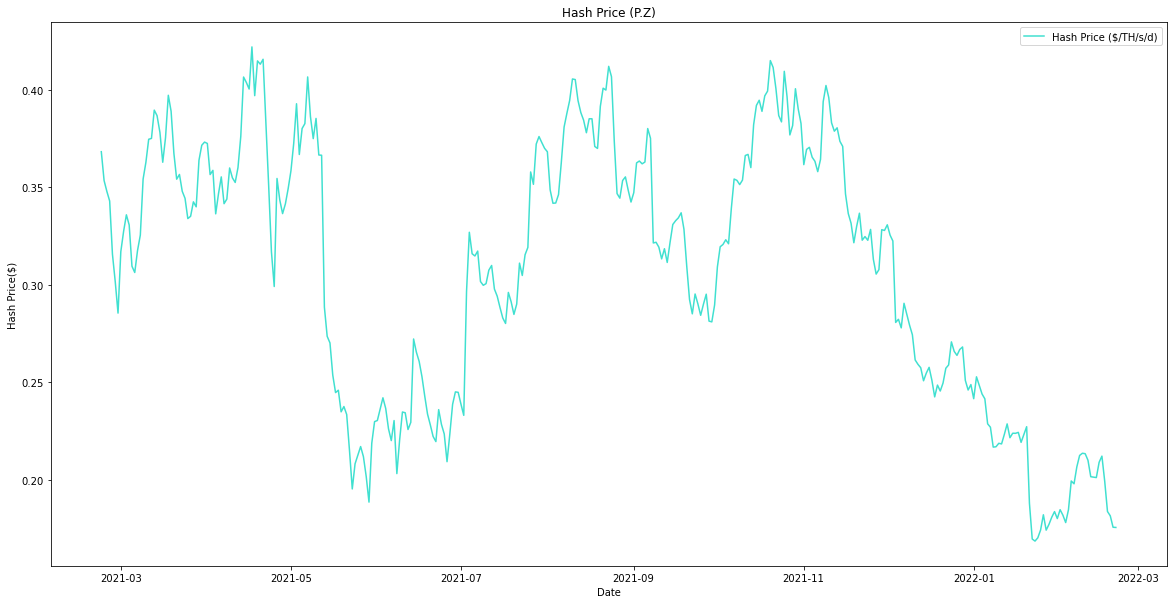

In [134]:
#Creating the chart to show hash price
plt.figure( figsize = ( 20, 10))
sns.lineplot(data=hashprice, x="Timestamp", y="Hashprice", color = 'turquoise')
plt.xlabel('Date')
plt.ylabel('Hash Price($)')
plt.title('Hash Price (P.Z)')
plt.legend(labels=['Hash Price ($/TH/s/d)'])

# Bitcoin Miners Economics
This analysis takes a look at the miners and their specifications in order to evaluate their value. The graphs contain a scatterplot comparing the power efficiencies and hashrate power. The more efficient the miner is, the less power it needs to produce a hash. Therefore, if the plot is viewed in quadrants, the lower right quadrant would be a favorable choice for picking the miner. In addition, denver's deriviative(DD) is introduced in a sample of popular miners in the market. The denver deriviative accounts for current hashprics without a direct evaluation from bitcoin price. Various scores allows for evaluation for the ASIC price, how long the ASIC would run for, and the level to borrow to buy all hardware.

In [107]:
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [99]:
miner_info = pd.read_excel('Miner_Info.xlsx')
miner_info_asics = pd.read_excel('Miner_Info.xlsx ','DenverAsics (2)')
miner_info.head()
miner_info_asics.head()
miner_info_asics.dropna()

,ASIC Model,Consumption(Watts),Hash Power (Th/s),Cost,Power Efficiency (J/T),Cost Efficiency ($/Th),WattDollar,Denver's Derivative,Hashprice,Elongated Hashprice
0,Antminer S19Pro,3250,110,12000,29.5,109.090909,3218.181818,46.371496,0.2,69.4
1,Antminer S19jPro,3068,104,9984,29.5,96.000000,2832.000000,40.806916,0.2,69.4
2,Antminer S19Pro + Hyd,5445,198,15048,27.5,76.000000,2090.000000,30.115274,0.2,69.4
3,Antminer S19XP,3010,140,11620,21.5,83.000000,1784.500000,25.713256,0.2,69.4
4,Whatsminer M30s++ 112,3472,112,13035,31.0,116.383929,3607.901786,51.987057,0.2,69.4
5,Whatsminer M30s++ 106 (neq),3286,106,8100,31.0,76.415094,2368.867925,34.133544,0.2,69.4
6,Whatsminer M32,3312,68,3557,50.0,52.308824,2615.441176,37.686472,0.2,69.4


In [133]:
#plot efficiencies
plt.figure( figsize = ( 20, 10))
x=miner_info['Hashrate(Th/s)']
y=miner_info['Power Efficiency (J/Th)']
sym=miner_info['Product']
import plotly.express as px
fig = px.scatter(miner_info, x, y, color=sym, log_x=True, title = 'Efficiencies of Bitcoin Hardware (P.Z)')
fig.show()

<Figure size 1440x720 with 0 Axes>

In [135]:
plt.figure( figsize = ( 50, 20))

x=miner_info_asics['Hash Power (Th/s)']
y=miner_info_asics['Power Efficiency (J/T)']
z=miner_info_asics["Denver's Derivative"]
sym=miner_info_asics['ASIC Model']
import plotly.express as px
fig = px.scatter(miner_info_asics, x, y,z,symbol=sym, log_x=True, title='Mining Hardware: Denver Derivative (P.Z)')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()


<Figure size 3600x1440 with 0 Axes>